# Описание проекта
 В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# Обзор данных

In [118]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица с разделителями '\t'. Некоторые значения пропущены, посмотрим, смогу ли я их заменить на что-то. Некоторые столбцы имеют не самый удобный формат значений, приведём всё в порядок.

# Предобрадотка данных

In [119]:
print(data['ceiling_height'].value_counts())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


Пропуски в высоте потолков заполняем медианным значением.

In [120]:
print(data['floors_total'].value_counts())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()).astype('int')
#print(data['floors_total'].value_counts())

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


Пропуски по этажности заполняем медианным значением и приводим к типу данных 'int', ведь количество этажей всегда целое число.

In [121]:
print(data['living_area'].value_counts())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64


Пропуски по жилплощади заполняем медианным значением.

In [122]:
print(data['is_apartment'].value_counts())
data['is_apartment'] = data['is_apartment'].astype('bool')

False    2725
True       50
Name: is_apartment, dtype: int64


Столбец 'is_apartment' нужно сдлеать булевым, чтобы можно было удобно работать с его значениями (не как с текстом, а как с да/нет).

In [123]:
print(data['kitchen_area'].value_counts())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64


Пропуски по площади кухни заполняем медианным значением.

In [124]:
print(data['balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0).astype('int')

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


Пропуски по количеству балконов логично заполнить нулями, ведь неуказанное количество балконов скорее всего свидетельствует о их отсутствии.

In [125]:
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
деревня Иссад                 1
деревня Нижние Осельки        1
поселок Почап                 1
деревня Борисова Грива        1
поселок Перово                1
Name: locality_name, Length: 364, dtype: int64

Пропуски названий населенных пунктов очень малочисленны, оставлю как есть. Можно было бы удалить эти строки, но я потом буду делать топ 10 популярных населенных пунктов и без названия просто войдут в категорию 'Другие'.

In [126]:
print(data['airports_nearest'].value_counts())
data['airports_nearest'] = (data['airports_nearest'] / 1000).round(0).astype('int', errors='ignore')

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64


Пропуски по аэропортам не трогаю, если нет расстояния- нет аэропорта. Перевожу расстояние из метров в километры с округлением.

In [127]:
print(data['cityCenters_nearest'].value_counts())
data['cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round(0).astype('int', errors='ignore')

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64


Тоже самое с ближайшим центром города.

In [128]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [129]:
print(data['parks_nearest'].value_counts())
data['parks_nearest'] = (data['parks_nearest'] / 1000).round(2)

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64


In [130]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [131]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

Парки и пруды могут влиять на стоимость квартиры, но на данном этапе эти данные в порядке и не влияют на основное исследование. Оставлю как есть, возможно, позже можно будет объединить в группы, или сделать сводную таблицу, или сделать классификацию.

In [132]:
print(data['days_exposition'].value_counts())
data = data.dropna(subset=['days_exposition']).reset_index(drop=True)
data['days_exposition'] = data['days_exposition'].astype('int')

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64


Строки с пропусками в столбце с временем продажи могут говорить о том, что квартира не была продана. Информация важная, эти пропуски непонятно чем заполнять, лучше не использовать эти строки в исследовании.

In [133]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Формат даты лучше сделать не текстовым, а именно форматом даты pandas.

In [134]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20518 entries, 0 to 20517
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  float64       
 6   floors_total          20518 non-null  int32         
 7   living_area           20518 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,11.00,2,посёлок Шушары,13.0,19.0,0.0,NaN,0.0,NaN,81
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,8.30,0,Санкт-Петербург,22.0,14.0,1.0,0.09,2.0,574.0,558
2,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.00,9,True,...,9.10,0,Санкт-Петербург,28.0,7.0,2.0,0.08,3.0,234.0,424
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,0,Санкт-Петербург,32.0,8.0,2.0,0.11,1.0,48.0,121
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
5,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,14.40,1,посёлок Парголово,53.0,19.0,0.0,NaN,0.0,NaN,155
6,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
7,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,6.50,2,Санкт-Петербург,51.0,15.0,0.0,NaN,0.0,NaN,289
8,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,8.50,0,Санкт-Петербург,38.0,14.0,1.0,0.31,2.0,553.0,137
9,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,6.00,1,Ломоносов,48.0,52.0,0.0,NaN,0.0,NaN,7


 Пропуски заполнены где можно (где важно). Типы данных приведены к нужным.
 Некоторые пропуски не важны (если квартира в жопе, то и парки и пруды не спасут).
 В основном использовалось заполнение пропусков медианой, потому что это наиболее точный метод при работе с числовыми значениями при наличии редких, но больших всплесков данных (потолки в общем и целом 2.5-2.7м, но иногда и 10м).
 Некоторые пропуски появились из-за отсутствия рядом с объектом запрашиваемых условий (аэропорты, парки и т.п.). Некоторые пропуски (например, высота потолков или название города) могли появиться из-за ошибок при вводе данных. 

# Дополнительные данные

In [135]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(2)

data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(3)

data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(3)

def floor_type(i):
    floor = i['floor']
    floors_total = i['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

data['weekday'] = data['first_day_exposition'].dt.weekday

data['month'] = data['first_day_exposition'].dt.month

data['year'] = data['first_day_exposition'].dt.year

display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,living_area_ratio,kitchen_area_ratio,floor_type,weekday,month,year
0,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0.0,NaN,81,82920.79,0.460,0.272,первый,1,12,2018
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2.0,574.0,558,92785.71,0.612,0.148,другой,3,8,2015
2,0,64900000.0,159.00,2015-07-24,3,2.65,14,30.00,9,True,...,3.0,234.0,424,408176.10,0.189,0.057,другой,4,7,2015
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121,100000.00,0.320,0.410,другой,1,6,2018
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55,95065.79,0.474,0.299,другой,0,9,2018
5,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0.0,NaN,155,99195.71,0.284,0.386,другой,3,11,2017
6,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189,87454.76,0.465,0.266,другой,2,5,2018
7,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289,88524.59,0.715,0.107,другой,6,2,2017
8,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,2.0,553.0,137,127525.25,0.513,0.215,другой,3,11,2017
9,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,0.0,NaN,7,75000.00,0.705,0.136,другой,0,8,2018


Дополнил таблицу столбцами: "цена за квадратный метр", "соотношение жилой и общей площади", "соотношение площади кухни к общей" и "категория этажа"

# Графики, графики повсюду

Общая площадь
count    20518.000000
mean        58.870830
std         34.077046
min         12.000000
25%         39.500000
50%         50.900000
75%         67.900000
max        900.000000
Name: total_area, dtype: float64


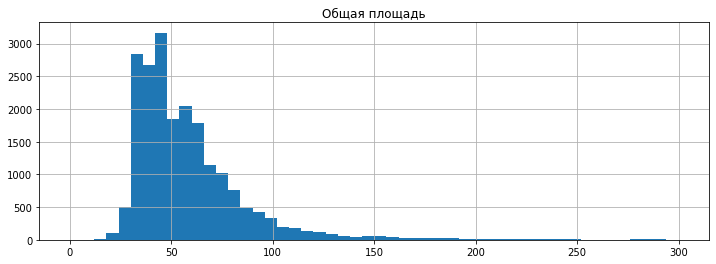

--------------------------------------------------------------------------------------------
Цена
count    2.051800e+04
mean     6.266173e+06
std      1.086298e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64


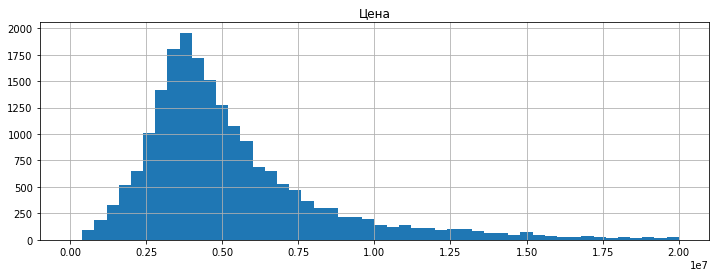

--------------------------------------------------------------------------------------------
Комнаты
count    20518.000000
mean         2.024564
std          1.054808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


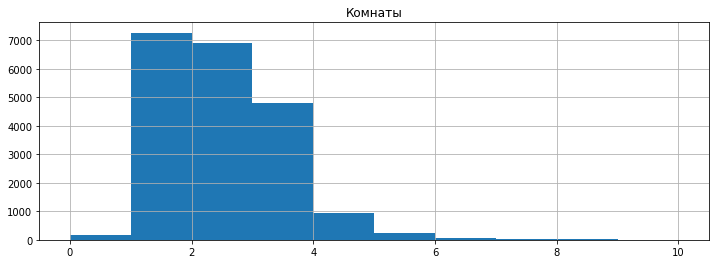

--------------------------------------------------------------------------------------------
Высота потолков
count    20518.000000
mean         2.715667
std          0.970099
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


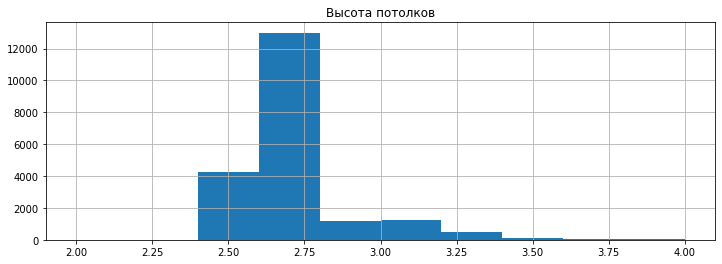

In [136]:
print('Общая площадь')
print(data['total_area'].describe())

data['total_area'].hist(bins=50, 
                        range=(0,300), 
                        figsize=(12,4)
                       )
plt.title('Общая площадь')
plt.show();

print('--------------------------------------------------------------------------------------------')

print('Цена')
print(data['last_price'].describe())

data['last_price'].hist(bins=50,
                        range=(0,20000000),
                        figsize=(12,4)
                       )
plt.title('Цена')
plt.show();

print('--------------------------------------------------------------------------------------------')

print('Комнаты')
print(data['rooms'].describe())

data['rooms'].hist(bins=10, 
                   range=(0,10),
                   figsize=(12,4)
                  )
plt.title('Комнаты')
plt.show();

print('--------------------------------------------------------------------------------------------')

print('Высота потолков')
print(data['ceiling_height'].describe())

data['ceiling_height'].hist(bins=10,
                            range=(2,4),
                            figsize=(12,4)
                           )
plt.title('Высота потолков')
plt.show();

Все гистограммы выглядят нормально, в большинстве случаев один выраженный пик, тяготеющий к медианному значению. Стоит почистить данные от выбросов и неверных данных (0 комнат, потолки ниже 2м). В общем, данные выглядят корректно.

Время продажи
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


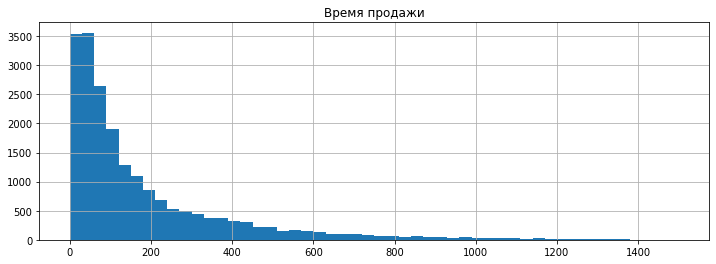

In [137]:
print('Время продажи')
print(data['days_exposition'].describe())

data['days_exposition'].hist(bins=50, 
                             range=(0,1500),
                             figsize=(12,4)
                            )
plt.title('Время продажи')
plt.show();

Гистограмма времени продажи выглядит как распределение Пуассона, это значит, что данные похожи на реальные. Анализ показывает, что большинство квартир были проданы в течение 95 дней. Это можно считать обычными продажами. Самые быстрые продажи занимали меньше полутора месяцев, их около четверти от общего числа. Только 25% от всех продаж длились дольше 230 дней.

# Еще больше обработки данных. Удаление выбросов

In [138]:
good_data = data.query('total_area <= 200')
good_data = good_data.query('last_price <= 15000000')
good_data = good_data.query('1 <= rooms <= 6')
good_data = good_data.query('ceiling_height <= 3.5')
good_data = good_data.query('days_exposition <= 800')

Удалив слишком маленькие или слишком большие значения, получилась более репрезентативная выборка. У нас имеются вполне средние показатели для всех параметров квартиры, без пропусков, без аномалий. Проверим это, сравнив с изначальными данными.

In [139]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18795 entries, 0 to 20517
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18795 non-null  int64         
 1   last_price            18795 non-null  float64       
 2   total_area            18795 non-null  float64       
 3   first_day_exposition  18795 non-null  datetime64[ns]
 4   rooms                 18795 non-null  int64         
 5   ceiling_height        18795 non-null  float64       
 6   floors_total          18795 non-null  int32         
 7   living_area           18795 non-null  float64       
 8   floor                 18795 non-null  int64         
 9   is_apartment          18795 non-null  bool          
 10  studio                18795 non-null  bool          
 11  open_plan             18795 non-null  bool          
 12  kitchen_area          18795 non-null  float64       
 13  balcony         

Таблица "похудела" на 4904 строки, это немало, около 21% данных, но оставшихся достаточно для исследования, тем более, что оно стало точнее.

In [140]:
print('Средняя общая площадь изначальная {:.2f}'.format(data['total_area'].mean()))
print('Медианная общая площадь изначальная {:.2f}'.format(data['total_area'].median()))
print('Средняя общая площадь обновленная {:.2f}'.format(good_data['total_area'].mean()))
print('Медианная общая площадь обновленная {:.2f}'.format(good_data['total_area'].median()))
print('***')
print('Средняя стоимость изначальная {:.2f}'.format(data['last_price'].mean()))
print('Медианная стоимость изначальная {:.2f}'.format(data['last_price'].median()))
print('Средняя стоимость обновленная {:.2f}'.format(good_data['last_price'].mean()))
print('Медианная стоимость обновленная {:.2f}'.format(good_data['last_price'].median()))
print('***')
print('Среднее количество комнат изначальная {:.2f}'.format(data['rooms'].mean()))
print('Медианная количество комнат изначальная {:.2f}'.format(data['rooms'].median()))
print('Среднее количество комнат обновленная {:.2f}'.format(good_data['rooms'].mean()))
print('Медианная количество комнат обновленная {:.2f}'.format(good_data['rooms'].median()))
print('***')
print('Средняя высота потолков изначальная {:.2f}'.format(data['ceiling_height'].mean()))
print('Медианная высота потолков изначальная {:.2f}'.format(data['ceiling_height'].median()))
print('Средняя высота потолков обновленная {:.2f}'.format(good_data['ceiling_height'].mean()))
print('Медианная высота потолков обновленная {:.2f}'.format(good_data['ceiling_height'].median()))
print('***')
print('Среднее время продажи изначальная {:.2f}'.format(data['days_exposition'].mean()))
print('Медианная время продажи изначальная {:.2f}'.format(data['days_exposition'].median()))
print('Среднее время продажи обновленная {:.2f}'.format(good_data['days_exposition'].mean()))
print('Медианная время продажи обновленная {:.2f}'.format(good_data['days_exposition'].median()))

Средняя общая площадь изначальная 58.87
Медианная общая площадь изначальная 50.90
Средняя общая площадь обновленная 54.23
Медианная общая площадь обновленная 49.50
***
Средняя стоимость изначальная 6266172.52
Медианная стоимость изначальная 4500000.00
Средняя стоимость обновленная 5022496.71
Медианная стоимость обновленная 4400000.00
***
Среднее количество комнат изначальная 2.02
Медианная количество комнат изначальная 2.00
Среднее количество комнат обновленная 1.95
Медианная количество комнат обновленная 2.00
***
Средняя высота потолков изначальная 2.72
Медианная высота потолков изначальная 2.65
Средняя высота потолков обновленная 2.67
Медианная высота потолков обновленная 2.65
***
Среднее время продажи изначальная 180.89
Медианная время продажи изначальная 95.00
Среднее время продажи обновленная 153.25
Медианная время продажи обновленная 90.00


Сравнение старых и новых значений показывает, что данные не исказились, а лишь стали точнее (приближение среднего значения к медианному- хороший знак).

# Поиск взаимосвязей
Какие факторы больше всего влияют на стоимость квартиры? Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра, на каком этаже расположена квартира, от даты размещения.

коэффициент корелляции 0.7466509715430295


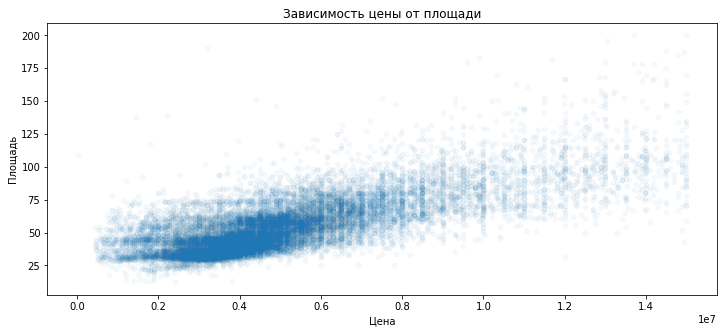

In [141]:
x = good_data['last_price'].corr(good_data['total_area'])
print(f'коэффициент корелляции {x}')

good_data.plot(x='last_price',
               y='total_area',
               kind="scatter", 
               alpha=0.04, 
               figsize=(12,5)
              )
plt.title('Зависимость цены от площади')
plt.xlabel('Цена')
plt.ylabel('Площадь');

Коэффициент корелляции площади и стоимости приближается к 1, значит, зависимость скорее есть. Судя по диаграмме, наблюдается повышение цены с увеличением площади квартиры.

коэффициент корелляции 0.4877349613192793


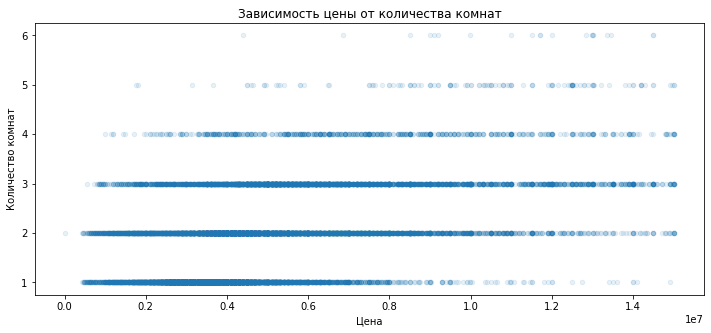

In [142]:
x = good_data['last_price'].corr(good_data['rooms'])
print(f'коэффициент корелляции {x}')

good_data.plot(x='last_price',
               y='rooms', 
               kind="scatter",
               alpha=0.1, 
               figsize=(12,5)
              )
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Цена')
plt.ylabel('Количество комнат');

Коэффициент корелляции количества комнат и стоимости приближается около 0.5, значит, зависимость если есть, то не очень сильная. Судя по диаграмме, наблюдается повышение небольшое цены с увеличением количества комнат.

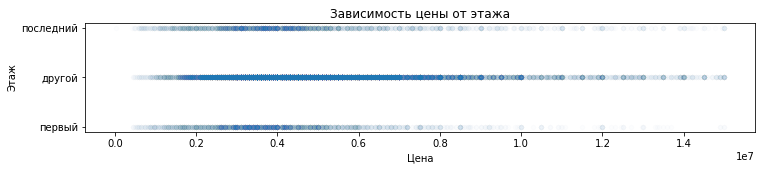

In [143]:
good_data.plot(x='last_price',
               y='floor_type',
               kind="scatter",
               alpha=0.01, 
               figsize=(12,2)
              )
plt.title('Зависимость цены от этажа')
plt.xlabel('Цена')
plt.ylabel('Этаж');

Судя по диаграмме, самые дешевые квартиры на первом и последнем этажах.

коэффициент корелляции -0.35145602173377144


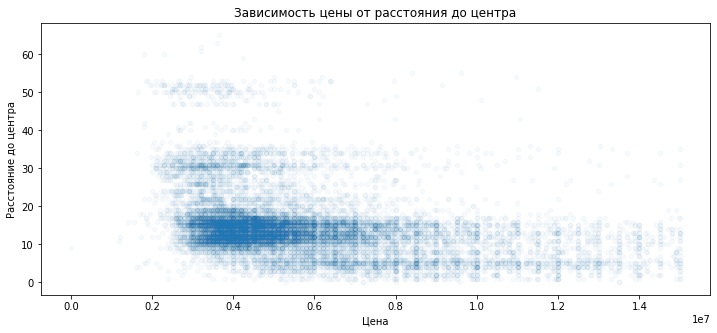

In [144]:
x = good_data['last_price'].corr(good_data['cityCenters_nearest'])
print(f'коэффициент корелляции {x}')

good_data.plot(x='last_price',
               y='cityCenters_nearest',
               kind="scatter",
               alpha=0.03,
               figsize=(12,5)
              )
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Цена')
plt.ylabel('Расстояние до центра');

Основная масса квартир в радиусе 20км от центра. В этом радиусе и самые дорогие объекты и не очень.

коэффициент корелляции -0.35145602173377144


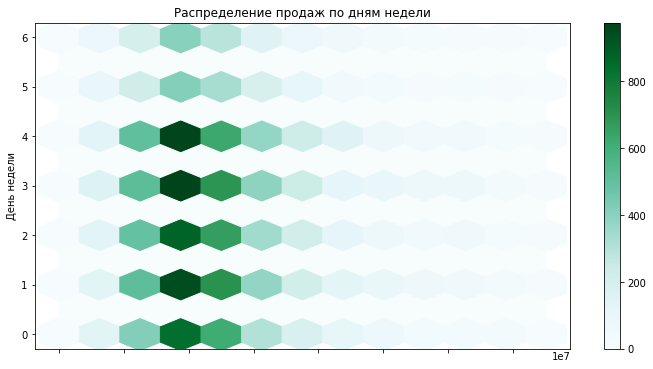

In [145]:
#good_data.plot(x='last_price', y='weekday', kind="scatter", alpha=0.04, figsize=(12,5))
x = good_data['last_price'].corr(good_data['cityCenters_nearest'])
print(f'коэффициент корелляции {x}')

good_data.plot.hexbin(x='last_price',
                      y='weekday',
                      gridsize=12,
                      figsize=(12,6)
                     )
plt.title('Распределение продаж по дням недели')
plt.ylabel('День недели');

Квартиры выставляют на продажу приемущественно по будням.

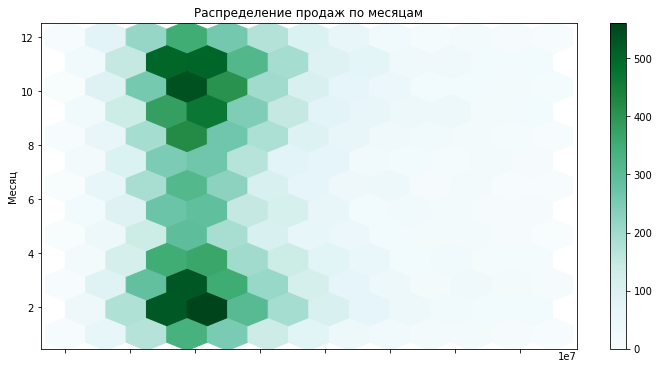

In [146]:
good_data.plot.hexbin(x='last_price',
                      y='month',
                      gridsize=12, 
                      figsize=(12,6)
                     )
plt.title('Распределение продаж по месяцам')
plt.ylabel('Месяц');

Самое "горячее" время для продажи квартиры- весна и осень.

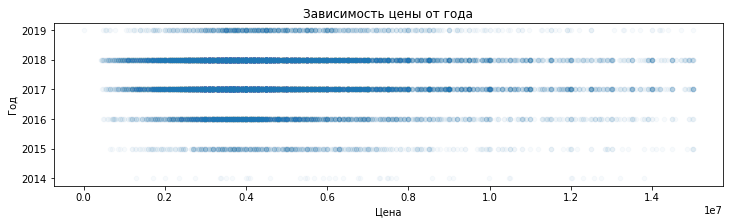

In [147]:
good_data.plot(x='last_price',
               y='year',
               kind="scatter",
               alpha=0.03, 
               figsize=(12,3)
              )
plt.title('Зависимость цены от года')
plt.xlabel('Цена')
plt.ylabel('Год');

Больше всего продаж было в 2017 и 2018 годах.

In [148]:
top_10_list = (good_data['locality_name']
               .value_counts()
               .head(10)
               .reset_index()
              )['index']

print(top_10_list)
top_10 = good_data.query('locality_name in @top_10_list')

0      Санкт-Петербург
1       посёлок Мурино
2       посёлок Шушары
3           Всеволожск
4              Колпино
5    посёлок Парголово
6               Пушкин
7      деревня Кудрово
8              Гатчина
9               Выборг
Name: index, dtype: object


Создаю список топ 10 городов по продажам квартир и делаю отдельную таблицу только с ними.

In [149]:
(
    top_10
    .pivot_table(index='locality_name',
                 values='square_meter_price',
                 aggfunc='mean'
                )
    .reset_index()
    .sort_values('square_meter_price', ascending=False)
)

,locality_name,square_meter_price
5,Санкт-Петербург,105575.814950
4,Пушкин,100174.060750
6,деревня Кудрово,92303.519455
8,посёлок Парголово,89673.773288
7,посёлок Мурино,85292.716331
9,посёлок Шушары,77582.940657
3,Колпино,74692.665941
2,Гатчина,68111.997752
0,Всеволожск,66679.292043
1,Выборг,57171.550663


Отсортированная таблица со средней ценой квадратного метра в каждом городе из топ 10. Видно, что самая высокая средняя цена квадрата в Санкт-Петербурге, а самая низкая в Выборге.

# Центр Санкт-Петербурга

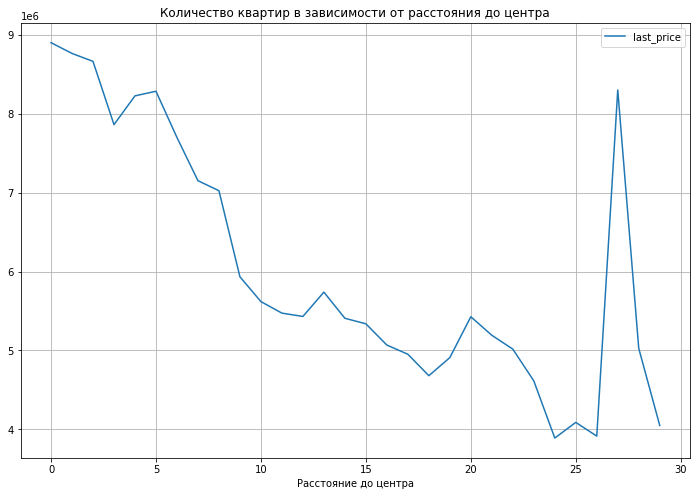

In [150]:
spb_chart = (
    top_10
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')
)

spb_chart.plot(grid=True, figsize=(12,8))
plt.title('Количество квартир в зависимости от расстояния до центра')
plt.xlabel('Расстояние до центра');

Судя по графику, наблюдается резкое снижение средней стоимости квартиры дальше 5км от центра Санкт-Петербурга. Область, радиусом 5км можно считать центральной зоной.

In [151]:
spb_centre_chart = top_10.query('cityCenters_nearest <= 5').query('locality_name == "Санкт-Петербург"')
#площадь, цена, число комнат, высота потолков, этаж, удалённость от центра, дата размещения объявления
spb_centre_chart.drop(columns = ['total_images', 
                                 'first_day_exposition', 
                                 'floors_total', 
                                 'floor',
                                 'living_area',
                                 'is_apartment', 
                                 'studio', 
                                 'open_plan', 
                                 'kitchen_area', 
                                 'balcony', 
                                 'locality_name', 
                                 'airports_nearest', 
                                 'parks_around3000', 
                                 'parks_nearest', 
                                 'ponds_around3000', 
                                 'ponds_nearest', 
                                 'days_exposition', 
                                 'square_meter_price', 
                                 'living_area_ratio', 
                                 'kitchen_area_ratio'], 
                      axis = 1, inplace=True)

Таблица spb_centre_chart содержит значение только для квартир в центре Санкт-Петербурга без лишних столбцов.

In [152]:
spb_centre_chart.corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.673375,0.481493,0.121085,-0.038711,-0.004631,-0.031880,0.001809
total_area,0.673375,1.000000,0.807098,0.184562,-0.080216,-0.001767,-0.036415,-0.101923
rooms,0.481493,0.807098,1.000000,0.184193,-0.104437,-0.006319,-0.016863,-0.059329
ceiling_height,0.121085,0.184562,0.184193,1.000000,-0.092984,-0.052623,-0.037469,0.111225
cityCenters_nearest,-0.038711,-0.080216,-0.104437,-0.092984,1.000000,-0.061857,0.006866,0.029319
weekday,-0.004631,-0.001767,-0.006319,-0.052623,-0.061857,1.000000,0.059952,-0.015161
month,-0.031880,-0.036415,-0.016863,-0.037469,0.006866,0.059952,1.000000,-0.181836
year,0.001809,-0.101923,-0.059329,0.111225,0.029319,-0.015161,-0.181836,1.000000


Таблица корелляций всех значений таблицы, нас интересует только первая строка (или первый столбец, без разницы). Это корелляции стоимости квартиры и остальных параметров. Как видно, больше всего влияет площадь и количество комнат. Остальные параметры не оказывают никакого влияния на стоимость. Проверим это на графиках.

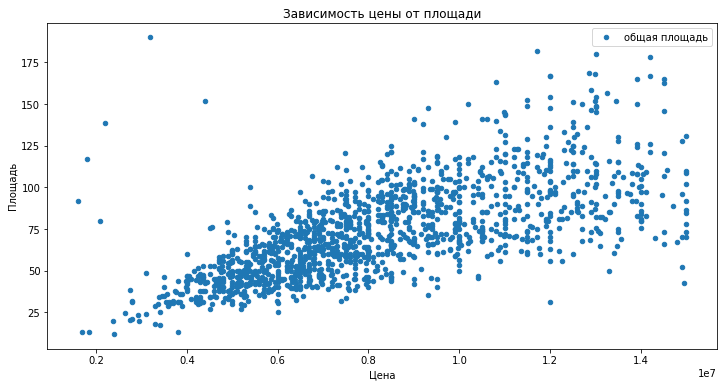

In [153]:
spb_centre_chart.plot(x='last_price',
                      y='total_area',
                      kind="scatter", 
                      alpha=1,
                      figsize=(12,6), 
                      label='общая площадь'
                     )
plt.title('Зависимость цены от площади')
plt.xlabel('Цена')
plt.ylabel('Площадь');

Довольно плотное распределение, видно прямую зависимость стоимости жилья от его площади.

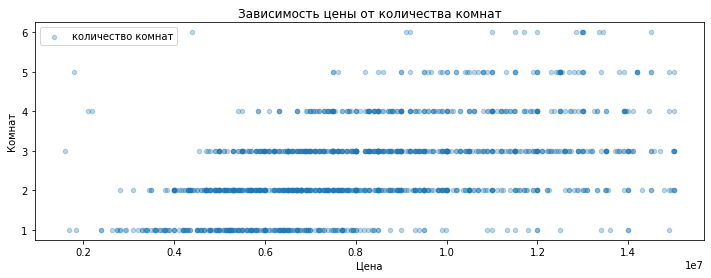

In [154]:
spb_centre_chart.plot(x='last_price',
                      y='rooms',
                      kind="scatter",
                      alpha=0.3,
                      figsize=(12,4), 
                      label='количество комнат'
                     )
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Цена')
plt.ylabel('Комнат');

Чем меньше комнат, тем дешевле. Ничего удивительного.

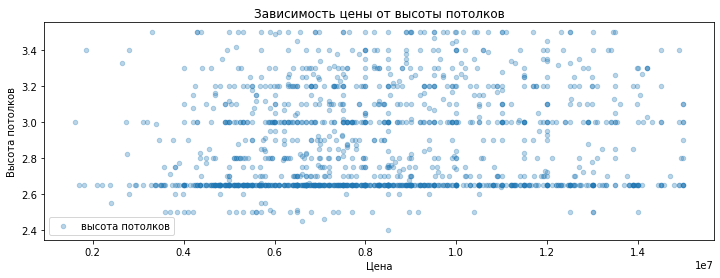

In [155]:
spb_centre_chart.plot(x='last_price',
                      y='ceiling_height',
                      kind="scatter",
                      alpha=0.3,
                      figsize=(12,4),
                      label='высота потолков'
                     )
plt.title('Зависимость цены от высоты потолков')
plt.xlabel('Цена')
plt.ylabel('Высота потолков');

Квартира с потолками 2.7 может стоить и 2 миллиона и 15 одинаково часто.

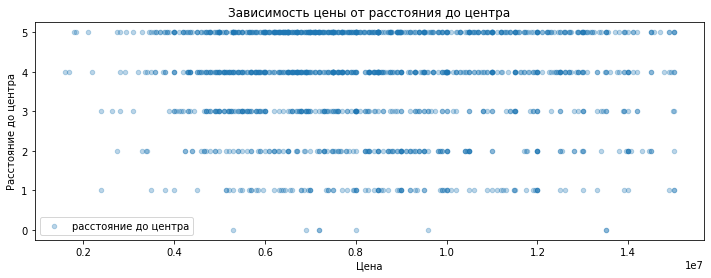

In [156]:
spb_centre_chart.plot(x='last_price',
                      y='cityCenters_nearest',
                      kind="scatter", 
                      alpha=0.3, 
                      figsize=(12,4), 
                      label='расстояние до центра'
                     )
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Цена')
plt.ylabel('Расстояние до центра');

Когда ты уже в центре- нет разницы, насколько ты близок к центральной точке на карте. 

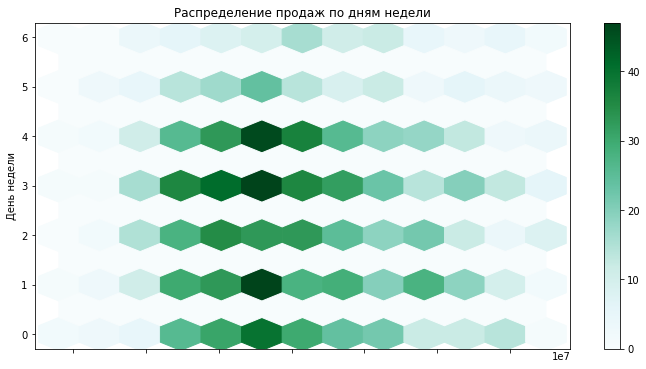

In [157]:
spb_centre_chart.plot.hexbin(x='last_price', 
                             y='weekday', 
                             gridsize=12, 
                             figsize=(12,6)
                            )
plt.title('Распределение продаж по дням недели')
plt.ylabel('День недели');

Как и в общей таблице, тут прослеживается желание продавать квартиры по будням.

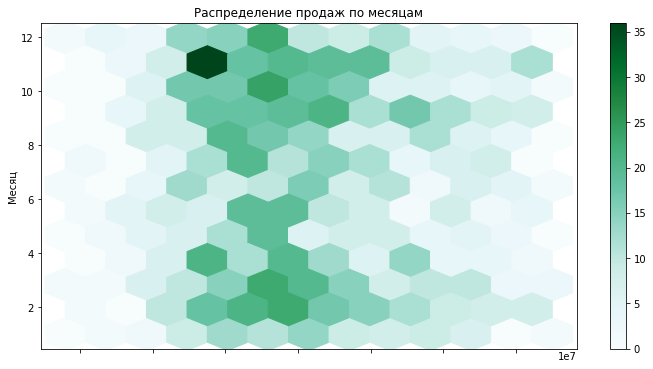

In [158]:
spb_centre_chart.plot.hexbin(x='last_price', 
                             y='month',
                             gridsize=12, 
                             figsize=(12,6)
                            )
plt.title('Распределение продаж по месяцам')
plt.ylabel('Месяц');

Распределение по временам года похожее на общее: чаще продают осенью и весной.

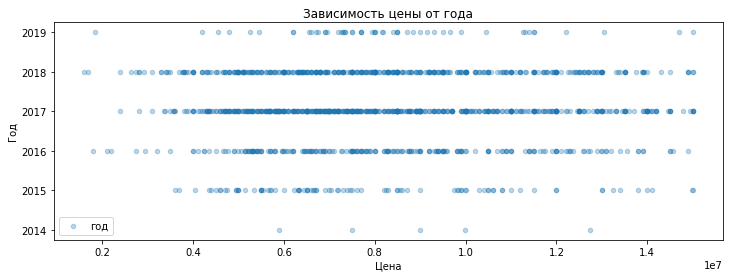

In [159]:
spb_centre_chart.plot(x='last_price', 
                      y='year',
                      kind="scatter", 
                      alpha=0.3, 
                      figsize=(12,4),
                      label='год'
                     )
plt.title('Зависимость цены от года')
plt.xlabel('Цена')
plt.ylabel('Год');

Как и со всеми другими объектами, самыми продаваемыми были 2017 и 2018 года.

# Выводы
 Первый вывод по всем данным: стоимость квартиры зависит от множества факторов, например: количество комнат (чем больше комнат, тем выше цена), общая площадь (тут все линейно: больше площадь- дороже квартира), этаж (люди готовы переплачивать за квартиру не на первом и последнем этаже), удаленность от центра (чем ближе к центру, тем выше стоимость). Причем, большинство квартир выставлено на продажу в будни, осенью или летом 2017 или 2018 года.
 Второй вывод касается квартир в центре Санкт-Петербурга: интересно, что квартиры в центре больше не стоят при приближении к центру, то есть условный радиус в 5км, внутри которого фактор близости к центру перестает влиять на стоимость. Остальные параметры работают как и в общем плане: количество комнат, площадь, этаж, день недели, месяц, год.